In [95]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [96]:
def display_img(img, cmap='gray'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

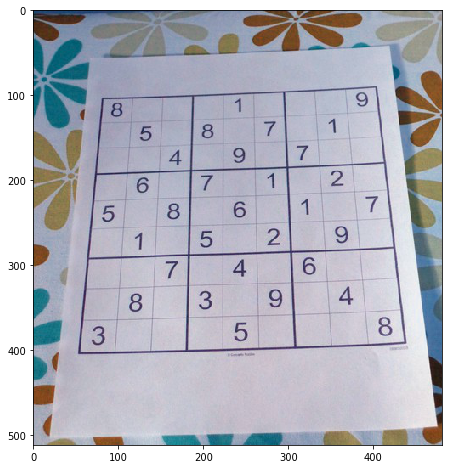

In [97]:
img = cv2.imread('Images/7.jpeg')
display_img(img, cmap=None)

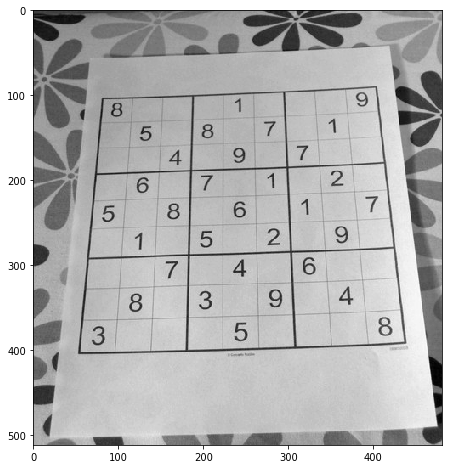

In [98]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display_img(img_gray)

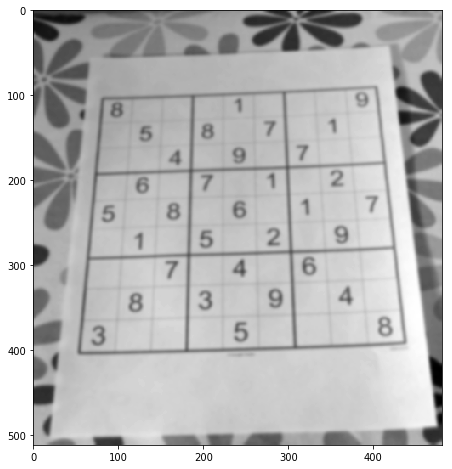

In [99]:
img_blur = cv2.GaussianBlur(img_gray,(9,9),0)
display_img(img_blur)

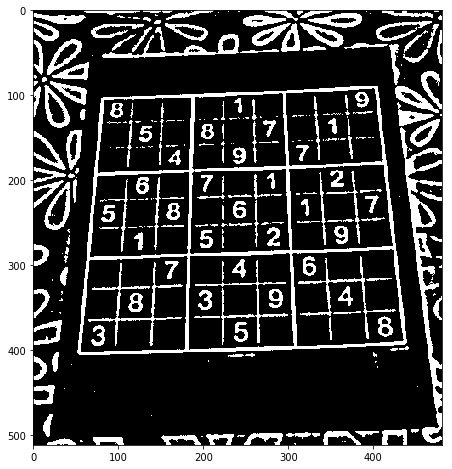

In [100]:
img_thresh = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
display_img(img_thresh)

In [101]:
_, contours, h = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
polygon = contours[0]

In [102]:
import operator

In [103]:
bottom_right, _ = max(enumerate([pt[0][0] + pt[0][1] for pt in
                      polygon]), key=operator.itemgetter(1))
top_left, _ = min(enumerate([pt[0][0] + pt[0][1] for pt in
                  polygon]), key=operator.itemgetter(1))
bottom_left, _ = min(enumerate([pt[0][0] - pt[0][1] for pt in
                     polygon]), key=operator.itemgetter(1))
top_right, _ = max(enumerate([pt[0][0] - pt[0][1] for pt in
                   polygon]), key=operator.itemgetter(1))

In [104]:
polygon[top_left][0], polygon[top_right][0], polygon[bottom_right][0], polygon[bottom_left][0]

(array([ 80, 103], dtype=int32),
 array([405,  90], dtype=int32),
 array([437, 393], dtype=int32),
 array([ 52, 403], dtype=int32))

In [105]:
polygon[top_left][0]

array([ 80, 103], dtype=int32)

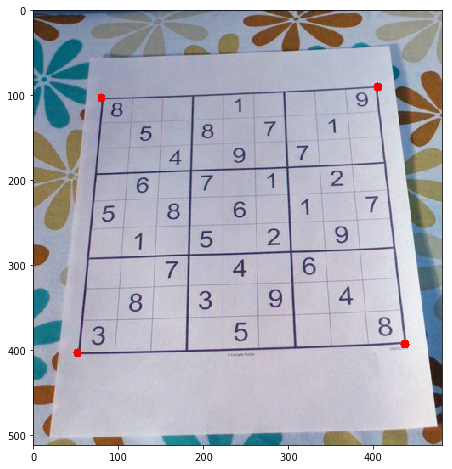

In [106]:
img_copy = img.copy()
cv2.circle(img=img_copy, center=(polygon[top_left][0][0],polygon[top_left][0][1]), radius=5, color=(255,0,0), thickness=-1)
cv2.circle(img=img_copy, center=(polygon[top_right][0][0],polygon[top_right][0][1]), radius=5, color=(255,0,0), thickness=-1)
cv2.circle(img=img_copy, center=(polygon[bottom_right][0][0],polygon[bottom_right][0][1]), radius=5, color=(255,0,0), thickness=-1)
cv2.circle(img=img_copy, center=(polygon[bottom_left][0][0],polygon[bottom_left][0][1]), radius=5, color=(255,0,0), thickness=-1)
display_img(img_copy, cmap=None)

In [107]:
def distance_between(pt1, pt2):
    dist = np.linalg.norm(pt1-pt2)
    return dist

array([ 80, 103], dtype=int32)

In [109]:
# top_left, top_right, bottom_right, bottom_left = crop_rect[0], crop_rect[1], crop_rect[2], crop_rect[3]
# top_left, top_right, bottom_right, bottom_left = polygon[top_left][0], polygon[top_right][0], polygon[bottom_right][0], polygon[bottom_left][0]
src = np.array([polygon[top_left][0], polygon[top_right][0], polygon[bottom_right][0], polygon[bottom_left][0]], dtype='float32') 
side = max([  distance_between(bottom_right, top_right), 
            distance_between(top_left, bottom_left),
            distance_between(bottom_right, bottom_left),   
            distance_between(top_left, top_right) ])

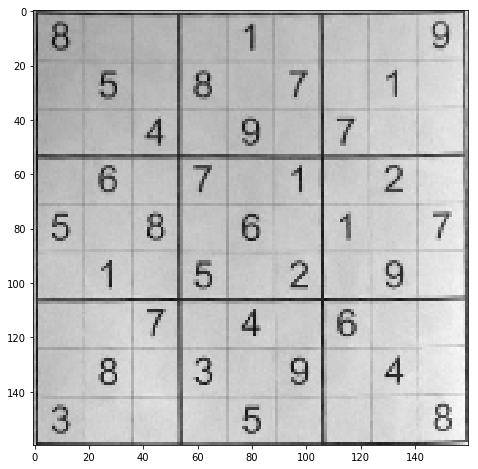

In [117]:
dst = np.array([[0, 0], [side - 1, 0], [side - 1, side - 1], [0, side - 1]], dtype='float32')
m = cv2.getPerspectiveTransform(src, dst)
img_tform = cv2.warpPerspective(img_gray, m, (int(side), int(side)))
display_img(img_tform)

In [121]:
squares = [] 
side = img_tform.shape[:1] 
side = side[0] / 9
for j in range(9):
    for i in range(9):
        p1 = (i * side, j * side)  #Top left corner of a box   
        p2 = ((i + 1) * side, (j + 1) * side)  #Bottom right corner         
        squares.append((p1, p2)) 

In [124]:
def get_digits(img, squares, size):
    """Extracts digits from their cells and builds an array"""
    digits = []
    img = img_tform.copy()

    for square in squares:
        digits.append(extract_digit(img, square, 28))
    return digits

In [126]:
digits = []
for square in squares:
    digits.append(extract_digit(img_tform, square, 28)

NameError: name 'cut_from_rect' is not defined